In [171]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [172]:
import matplotlib.pyplot as plt
from skimage.transform import resize
import skimage.io
import cv2

# import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

# from skimage.io import imreaad, imshow
from skimage.transform import resize
import skimage.io
import cv2

import tensorflow as tf

# Don't Show Warning Messages
import warnings
warnings.filterwarnings('ignore')

from keras.callbacks import ModelCheckpoint

import keras
import segmentation_models as sm

In [3]:
def get_local_image(img_path):
    image = cv2.imread('images/test/image//' + img_path)
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

In [37]:
imgBGR1 = get_local_image('002.jpg')
imgBGR2 = get_local_image('006.jpg')
imgBGR3 = get_local_image('008.jpg')
imgBGR4 = get_local_image('011.jpg')
imgBGR5 = get_local_image('016.jpg')
imgBGR6 = get_local_image('024.jpg')
imgBGR7 = get_local_image('038.jpg')
imgBGR8 = get_local_image('043.jpg')
imgBGR9 = get_local_image('050.jpg')
imgBGR10 = get_local_image('061.jpg')
imgBGR11 = get_local_image('092.jpg')
imgBGR12 = get_local_image('010.jpg')

(-0.5, 511.5, 511.5, -0.5)

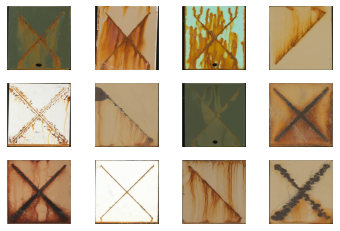

In [39]:
# plt.figure(figsize=(10, 10))
f, axarr = plt.subplots(3,4)
axarr[0,0].imshow(imgBGR1)
axarr[0,0].axis('off')
axarr[0,1].imshow(imgBGR2)
axarr[0,1].axis('off')
axarr[0,2].imshow(imgBGR3)
axarr[0,2].axis('off')
axarr[0,3].imshow(imgBGR4)
axarr[0,3].axis('off')
axarr[1,0].imshow(imgBGR11)
axarr[1,0].axis('off')
axarr[1,1].imshow(imgBGR6)
axarr[1,1].axis('off')
axarr[1,2].imshow(imgBGR12)
axarr[1,2].axis('off')
axarr[1,3].imshow(imgBGR8)
axarr[1,3].axis('off')
axarr[2,0].imshow(imgBGR9)
axarr[2,0].axis('off')
axarr[2,1].imshow(imgBGR10)
axarr[2,1].axis('off')
axarr[2,2].imshow(imgBGR5)
axarr[2,2].axis('off')
axarr[2,3].imshow(imgBGR7)
axarr[2,3].axis('off')

In [3]:
def get_local_image(img_path):
    image = cv2.imread(img_path)
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

In [4]:
imgBGR1 = get_local_image('images/test/007.jpg')
imgBGR2 = get_local_image('images/test/055.jpg')
imgBGR3 = get_local_image('images/test/066.jpg')
imgBGR4 = get_local_image('images/test/095.jpg')
imgBGR5 = get_local_image('images/test/080.jpg')
mask1 = get_local_image('images/test/label/007_mask.jpg')
mask2 = get_local_image('images/test/label/055_mask.jpg')
mask3 = get_local_image('images/test/label/066_mask.jpg')
mask4 = get_local_image('images/test/label/095_mask.jpg')
mask5 = get_local_image('images/test/label/080_mask.jpg')
mask1_2 = get_local_image('../automated_masks_all//I72_Aluminum_mill-finish_Magnesium-Rich_none_MIL-DTL-64159.jpg')
mask2_2 = get_local_image('../automated_masks_all/I424_Steel---LCS_mill-finish_Zinc-Phosphate-(nonchrome-seal)_MIL-DTL-53022_MIL-DTL-64159.jpg')
mask3_2 = get_local_image('../automated_masks_all/I456_Steel---HHA_abrasive-blasted_Zinc-Phosphate-(nonchrome-seal)_MIL-PRF-23377_MIL-PRF-85285.jpg')
mask4_2 = get_local_image('../automated_masks_all/I571_Steel---HHA_abrasive-blasted_Zinc-Phosphate-(chrome-seal)_MIL-PRF-23377_MIL-PRF-85285.jpg')
mask5_2 = get_local_image('../automated_masks_all/I524_Steel---HHA_abrasive-blasted_trivalent-chromium-pretreatment_MIL-DTL-53022_MIL-DTL-64159.jpg')

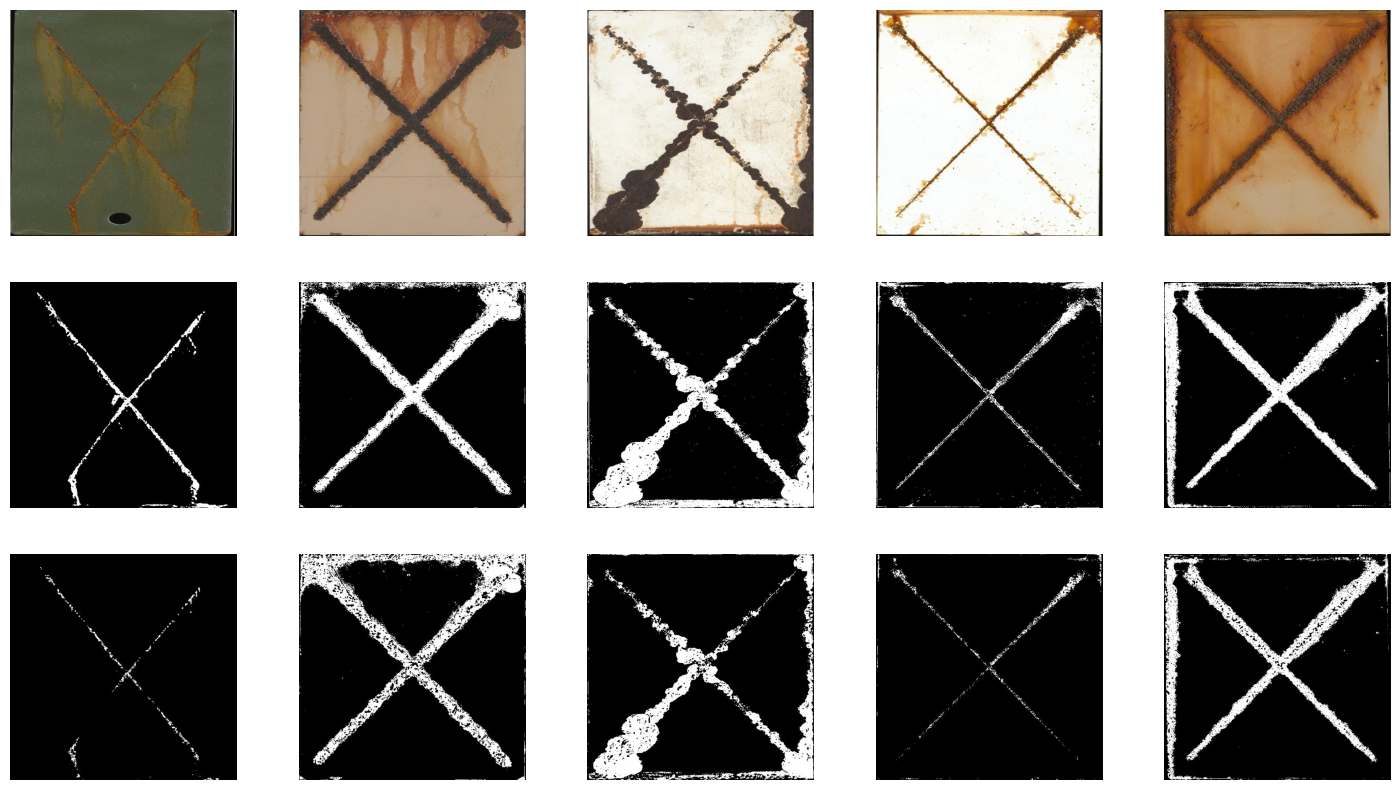

In [7]:
f, axarr = plt.subplots(3,5, figsize=(18, 10))
# grid = plt.GridSpec(2, 5)
# f.suptitle(f'Subfigure title')
[axi.set_axis_off() for axi in axarr.ravel()]
axarr[0,0].imshow(imgBGR1)
axarr[1,0].imshow(mask1)
axarr[2,0].imshow(mask1_2)
axarr[0,1].imshow(imgBGR2)
axarr[1,1].imshow(mask2)
axarr[2,1].imshow(mask2_2)
axarr[0,2].imshow(imgBGR3)
axarr[1,2].imshow(mask3)
axarr[2,2].imshow(mask3_2)
axarr[0,3].imshow(imgBGR4)
axarr[1,3].imshow(mask4)
axarr[2,3].imshow(mask4_2)
axarr[0,4].imshow(imgBGR5)
axarr[1,4].imshow(mask5)
axarr[2,4].imshow(mask5_2)

In [173]:
keras.backend.set_image_data_format('channels_last')

fpn = sm.FPN('resnet18', classes=1, activation='sigmoid')
fpn.load_weights('fpn18_final.h5')

unet = sm.Unet('vgg16', classes=1, activation='sigmoid')
unet.load_weights('unet_vgg16_final.h5')

linknet = sm.Linknet('inceptionv3', classes=1, activation='sigmoid')
linknet.load_weights('linknet_incep3_final.h5')

pspnet = sm.PSPNet('efficientnetb3', classes=1, activation='sigmoid')
pspnet.load_weights('pspnet_eff3_final.h5')

In [174]:
def get_file_list(src_dst):

    file_list = os.listdir(src_dst)
    file_list.sort()
    return file_list

def binary_mask(x):
    x = np.where(x >= 180, 255, x)
    x = np.where(x < 180, 0, x)
    return x.astype(dtype=np.uint8)

def binary_mask_test(x):
    x = np.where(x == 1, 255, x)
    x = np.where(x == 0, 0, x)
    return x.astype(dtype=np.uint8)

def binary_mask_recode(x):
    x = np.where(x < 180, 0, x)
    x = np.where(x >= 180, 255, x)
    return x.astype(dtype=np.uint8)

def recode_before_train(x):
    x = np.where(x == 255, 1, 0)
    # x = np.where(x == 0, x)
    return x.astype(dtype=np.float32)

In [175]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3

In [176]:
# Get lists of images and their masks
test_id_list = get_file_list('images/test/image/')
test_mask_id_list = get_file_list('images/test/label/')

In [177]:
# Create empty arrays
X_test = np.zeros((len(test_id_list), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

Y_test = np.zeros((len(test_mask_id_list), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.float32)

In [178]:
# X_test

for i, image_id in enumerate(test_id_list):
    
    path_image = test_id_list + image_id
    
    # read the image using skimage
    image = skimage.io.imread(path_image)
    
    # resize the image
    image = resize(image, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    
    # insert the image into X_test
    X_test[i] = image
    
X_test.shape

(21, 384, 384, 3)

In [179]:
# Y_test


for i, mask_id in enumerate(test_mask_id_list):
    
    path_mask = test_mask_id_list + mask_id
    
    # read the image using skimage
    mask = skimage.io.imread(path_mask)
    # mask = binary_mask_recode(mask)
    
    # resize the image
    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    mask = binary_mask_recode(mask)
    
    # use np.expand dims to add a channel axis so the shape becomes (IMG_HEIGHT, IMG_WIDTH, 1)
    mask = np.expand_dims(mask, axis=-1)
    
    # insert the image into Y_test
    Y_test[i] = mask

Y_test.shape

(21, 384, 384, 1)

In [180]:
BACKBONE_fpn = 'resnet18'
preprocess_input_fpn = sm.get_preprocessing(BACKBONE_fpn)
X_test_fpn = preprocess_input_fpn(X_test)

BACKBONE_unet = 'vgg16'
preprocess_input_unet = sm.get_preprocessing(BACKBONE_unet)
X_test_unet = preprocess_input_unet(X_test)

BACKBONE_linknet = 'inceptionv3'
preprocess_input_linknet = sm.get_preprocessing(BACKBONE_linknet)
X_test_linknet = preprocess_input_linknet(X_test)

BACKBONE_pspnet = 'efficientnetb3'
preprocess_input_pspnet = sm.get_preprocessing(BACKBONE_pspnet)
X_test_pspnet = preprocess_input_pspnet(X_test)

In [164]:
%%timeit
test_preds_fpn = fpn.predict(X_test_fpn)
preds_test_thresh_fpn = (test_preds_fpn >= 0.5).astype(np.uint8)
pred_img_fpn = binary_mask_test(preds_test_thresh_fpn)

1/1 [==============================] - 11s 11s/step
11.1 s ± 1.73 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [165]:
%%timeit
test_preds_unet = unet.predict(X_test_unet)
preds_test_thresh_unet = (test_preds_unet >= 0.5).astype(np.uint8)
pred_img_unet = binary_mask_test(preds_test_thresh_unet)

1/1 [==============================] - 11s 11s/step
10.8 s ± 145 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [166]:
%%timeit
test_preds_linknet = linknet.predict(X_test_linknet)
preds_test_thresh_linknet = (test_preds_linknet >= 0.5).astype(np.uint8)
pred_img_linknet = binary_mask_test(preds_test_thresh_linknet)

1/1 [==============================] - 3s 3s/step
3.26 s ± 125 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [167]:
%%timeit
test_preds_pspnet = pspnet.predict(X_test_pspnet)
preds_test_thresh_pspnet = (test_preds_pspnet >= 0.5).astype(np.uint8)
pred_img_pspnet = binary_mask_test(preds_test_thresh_pspnet)

1/1 [==============================] - 5s 5s/step
4.85 s ± 321 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [181]:
test_preds_fpn = fpn.predict(X_test_fpn)
preds_test_thresh_fpn = (test_preds_fpn >= 0.5).astype(np.uint8)
pred_img_fpn = binary_mask_test(preds_test_thresh_fpn)

test_preds_unet = unet.predict(X_test_unet)
preds_test_thresh_unet = (test_preds_unet >= 0.5).astype(np.uint8)
pred_img_unet = binary_mask_test(preds_test_thresh_unet)

test_preds_linknet = linknet.predict(X_test_linknet)
preds_test_thresh_linknet = (test_preds_linknet >= 0.5).astype(np.uint8)
pred_img_linknet = binary_mask_test(preds_test_thresh_linknet)

test_preds_pspnet = pspnet.predict(X_test_pspnet)
preds_test_thresh_pspnet = (test_preds_pspnet >= 0.5).astype(np.uint8)
pred_img_pspnet = binary_mask_test(preds_test_thresh_pspnet)

1/1 [==============================] - 6s 6s/step


In [169]:
imgBGR1 = get_local_image('../test/image/089.jpg')
imgBGR2 = get_local_image('../test/image/104.jpg')
imgBGR3 = get_local_image('../test/image/069.jpg')
imgBGR4 = get_local_image('../test/image/039.jpg')
imgBGR5 = get_local_image('../test/image/019.jpg')

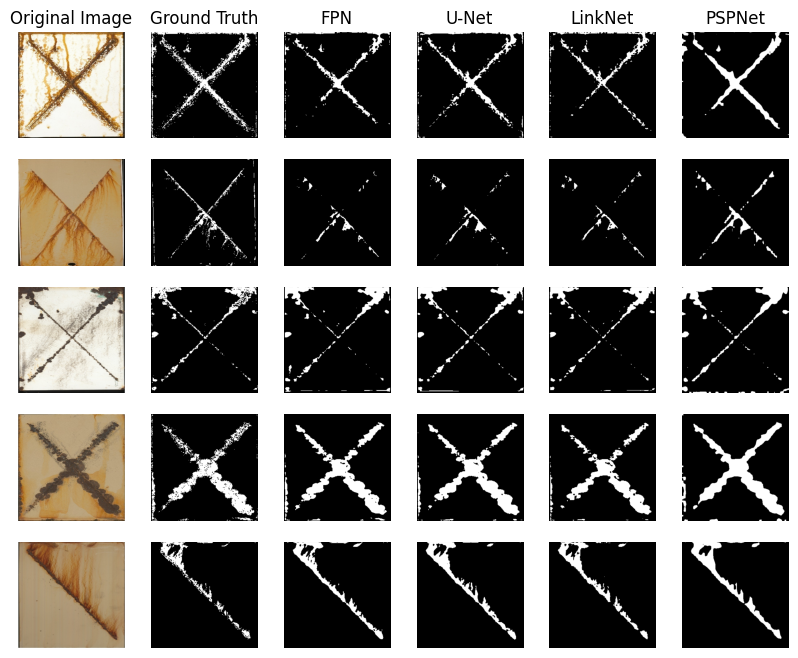

In [170]:
# Display a thresholded mask
# 16; 6; 19; 12; 20
img = [16,20,12,6,2]
# actual_img = X_test[img, :, :, 0]
ground_truth = Y_test[img, :, :, 0]
fpn_pred = pred_img_fpn[img, :, :, 0]
unet_pred = pred_img_unet[img, :, :, 0]
linknet_pred = pred_img_linknet[img, :, :, 0]
pspnet_pred = pred_img_pspnet[img, :, :, 0]

f, axarr = plt.subplots(5,6, figsize=(10, 8))

[axi.set_axis_off() for axi in axarr.ravel()]

axarr[0,0].set_title('Original Image')
axarr[0,1].set_title('Ground Truth')
axarr[0,2].set_title('FPN')
axarr[0,3].set_title('U-Net')
axarr[0,4].set_title('LinkNet')
axarr[0,5].set_title('PSPNet')

axarr[0,0].imshow(imgBGR1)
axarr[0,1].imshow(ground_truth[0], cmap='gray')
axarr[0,2].imshow(fpn_pred[0], cmap='gray')
axarr[0,3].imshow(unet_pred[0], cmap='gray')
axarr[0,4].imshow(linknet_pred[0], cmap='gray')
axarr[0,5].imshow(pspnet_pred[0], cmap='gray')

axarr[1,0].imshow(imgBGR2)
axarr[1,1].imshow(ground_truth[1], cmap='gray')
axarr[1,2].imshow(fpn_pred[1], cmap='gray')
axarr[1,3].imshow(unet_pred[1], cmap='gray')
axarr[1,4].imshow(linknet_pred[1], cmap='gray')
axarr[1,5].imshow(pspnet_pred[1], cmap='gray')

axarr[2,0].imshow(imgBGR3)
axarr[2,1].imshow(ground_truth[2], cmap='gray')
axarr[2,2].imshow(fpn_pred[2], cmap='gray')
axarr[2,3].imshow(unet_pred[2], cmap='gray')
axarr[2,4].imshow(linknet_pred[2], cmap='gray')
axarr[2,5].imshow(pspnet_pred[2], cmap='gray')

axarr[3,0].imshow(imgBGR4)
axarr[3,1].imshow(ground_truth[3], cmap='gray')
axarr[3,2].imshow(fpn_pred[3], cmap='gray')
axarr[3,3].imshow(unet_pred[3], cmap='gray')
axarr[3,4].imshow(linknet_pred[3], cmap='gray')
axarr[3,5].imshow(pspnet_pred[3], cmap='gray')

axarr[4,0].imshow(imgBGR5)
axarr[4,1].imshow(ground_truth[4], cmap='gray')
axarr[4,2].imshow(fpn_pred[4], cmap='gray')
axarr[4,3].imshow(unet_pred[4], cmap='gray')
axarr[4,4].imshow(linknet_pred[4], cmap='gray')
axarr[4,5].imshow(pspnet_pred[4], cmap='gray')

In [259]:
img = [16,20,12,6,2]
# actual_img = X_test[img, :, :, 0]
ground_truth = Y_test[img, :, :, 0]
fpn_pred = pred_img_fpn[img, :, :, 0]
unet_pred = pred_img_unet[img, :, :, 0]
linknet_pred = pred_img_linknet[img, :, :, 0]
pspnet_pred = pred_img_pspnet[img, :, :, 0]

# imgBGR1 = get_local_image('../test/image/089.jpg')
# imgBGR2 = get_local_image('../test/image/104.jpg')
# imgBGR3 = get_local_image('../test/image/069.jpg')
# imgBGR4 = get_local_image('../test/image/039.jpg')
# imgBGR5 = get_local_image('../test/image/019.jpg')

In [274]:
imgBGR1_1 = get_local_image('../images_for_masking/089.jpg')
imgBGR1_2 = get_local_image('../images_for_masking/089.jpg')
imgBGR2_1 = get_local_image('../images_for_masking/104.jpg')
imgBGR2_2 = get_local_image('../images_for_masking/104.jpg')
imgBGR3_1 = get_local_image('../images_for_masking/069.jpg')
imgBGR3_2 = get_local_image('../images_for_masking/069.jpg')
imgBGR4_1 = get_local_image('../images_for_masking/039.jpg')
imgBGR4_2 = get_local_image('../images_for_masking/039.jpg')
imgBGR5_1 = get_local_image('../images_for_masking/019.jpg')
imgBGR5_2 = get_local_image('../images_for_masking/019.jpg')
mask1 = get_local_image('../masks//007_mask.jpg')
mask1 = binary_mask_recode(mask1)
mask2 = get_local_image('../masks/055_mask.jpg')
mask2 = binary_mask_recode(mask2)
mask3 = get_local_image('../masks/066_mask.jpg')
mask3 = binary_mask_recode(mask3)
mask4 = get_local_image('../masks/095_mask.jpg')
mask4 = binary_mask_recode(mask4)
mask5 = get_local_image('../masks/080_mask.jpg')
mask5 = binary_mask_recode(mask5)
mask1_2 = get_local_image('../automated_masks_all//I72_Aluminum_mill-finish_Magnesium-Rich_none_MIL-DTL-64159.jpg')
mask1_2 = binary_mask_recode(mask1_2)
mask2_2 = get_local_image('../automated_masks_all/I424_Steel---LCS_mill-finish_Zinc-Phosphate-(nonchrome-seal)_MIL-DTL-53022_MIL-DTL-64159.jpg')
mask2_2 = binary_mask_recode(mask2_2)
mask3_2 = get_local_image('../automated_masks_all/I456_Steel---HHA_abrasive-blasted_Zinc-Phosphate-(nonchrome-seal)_MIL-PRF-23377_MIL-PRF-85285.jpg')
mask3_2 = binary_mask_recode(mask3_2)
mask4_2 = get_local_image('../automated_masks_all/I571_Steel---HHA_abrasive-blasted_Zinc-Phosphate-(chrome-seal)_MIL-PRF-23377_MIL-PRF-85285.jpg')
mask4_2 = binary_mask_recode(mask4_2)
mask5_2 = get_local_image('../automated_masks_all/I524_Steel---HHA_abrasive-blasted_trivalent-chromium-pretreatment_MIL-DTL-53022_MIL-DTL-64159.jpg')
mask5_2 = binary_mask_recode(mask5_2)

In [275]:
imgBGR1_1 = cv2.resize(imgBGR1_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR2_1 = cv2.resize(imgBGR2_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR3_1 = cv2.resize(imgBGR3_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR4_1 = cv2.resize(imgBGR4_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR5_1 = cv2.resize(imgBGR5_1, (256, 256), interpolation= cv2.INTER_LINEAR)

imgBGR1_2 = cv2.resize(imgBGR1_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR2_2 = cv2.resize(imgBGR2_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR3_2 = cv2.resize(imgBGR3_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR4_2 = cv2.resize(imgBGR4_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR5_2 = cv2.resize(imgBGR5_1, (256, 256), interpolation= cv2.INTER_LINEAR)

imgBGR1_3 = cv2.resize(imgBGR1_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR2_3 = cv2.resize(imgBGR2_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR3_3 = cv2.resize(imgBGR3_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR4_3 = cv2.resize(imgBGR4_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR5_3 = cv2.resize(imgBGR5_1, (256, 256), interpolation= cv2.INTER_LINEAR)

imgBGR1_4 = cv2.resize(imgBGR1_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR2_4 = cv2.resize(imgBGR2_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR3_4 = cv2.resize(imgBGR3_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR4_4 = cv2.resize(imgBGR4_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR5_4 = cv2.resize(imgBGR5_1, (256, 256), interpolation= cv2.INTER_LINEAR)

imgBGR1_1_2 = cv2.resize(imgBGR1_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR2_1_2 = cv2.resize(imgBGR2_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR3_1_2 = cv2.resize(imgBGR3_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR4_1_2 = cv2.resize(imgBGR4_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR5_1_2 = cv2.resize(imgBGR5_1, (256, 256), interpolation= cv2.INTER_LINEAR)

imgBGR1_2_2 = cv2.resize(imgBGR1_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR2_2_2 = cv2.resize(imgBGR2_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR3_2_2 = cv2.resize(imgBGR3_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR4_2_2 = cv2.resize(imgBGR4_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR5_2_2 = cv2.resize(imgBGR5_1, (256, 256), interpolation= cv2.INTER_LINEAR)

imgBGR1_3_2 = cv2.resize(imgBGR1_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR2_3_2 = cv2.resize(imgBGR2_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR3_3_2 = cv2.resize(imgBGR3_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR4_3_2 = cv2.resize(imgBGR4_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR5_3_2 = cv2.resize(imgBGR5_1, (256, 256), interpolation= cv2.INTER_LINEAR)

imgBGR1_4_2 = cv2.resize(imgBGR1_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR2_4_2 = cv2.resize(imgBGR2_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR3_4_2 = cv2.resize(imgBGR3_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR4_4_2 = cv2.resize(imgBGR4_1, (256, 256), interpolation= cv2.INTER_LINEAR)
imgBGR5_4_2 = cv2.resize(imgBGR5_1, (256, 256), interpolation= cv2.INTER_LINEAR)

In [276]:
imgBGR1_1[fpn_pred[0] == 255] = [0, 0, 255]
imgBGR2_1[fpn_pred[1] == 255] = [0, 0, 255]
imgBGR3_1[fpn_pred[2] == 255] = [0, 0, 255]
imgBGR4_1[fpn_pred[3] == 255] = [0, 0, 255]
imgBGR5_1[fpn_pred[4] == 255] = [0, 0, 255]

imgBGR1_2[unet_pred[0] == 255] = [255, 0, 0]
imgBGR2_2[unet_pred[1] == 255] = [255, 0, 0]
imgBGR3_2[unet_pred[2] == 255] = [255, 0, 0]
imgBGR4_2[unet_pred[3] == 255] = [255, 0, 0]
imgBGR5_2[unet_pred[4] == 255] = [255, 0, 0]

imgBGR1_3[linknet_pred[0] == 255] = [0, 255, 255]
imgBGR2_3[linknet_pred[1] == 255] = [0, 255, 255]
imgBGR3_3[linknet_pred[2] == 255] = [0, 255, 255]
imgBGR4_3[linknet_pred[3] == 255] = [0, 255, 255]
imgBGR5_3[linknet_pred[4] == 255] = [0, 255, 255]

imgBGR1_4[pspnet_pred[0] == 255] = [255, 255, 0]
imgBGR2_4[pspnet_pred[1] == 255] = [255, 255, 0]
imgBGR3_4[pspnet_pred[2] == 255] = [255, 255, 0]
imgBGR4_4[pspnet_pred[3] == 255] = [255, 255, 0]
imgBGR5_4[pspnet_pred[4] == 255] = [255, 255, 0]

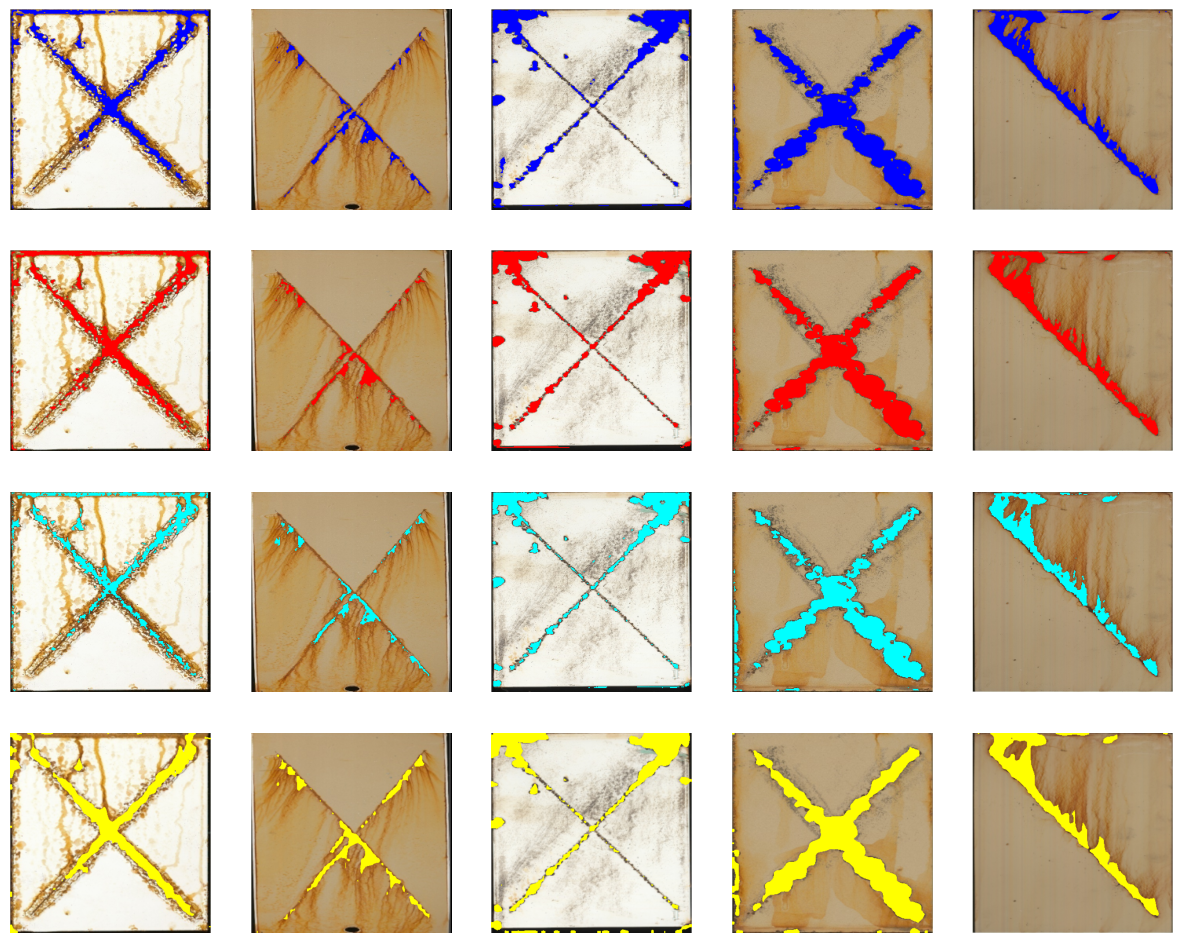

In [278]:
f, axarr = plt.subplots(4,5, figsize=(15, 12))

[axi.set_axis_off() for axi in axarr.ravel()]
axarr[0,0].imshow(imgBGR1_1)
axarr[0,1].imshow(imgBGR2_1)
axarr[0,2].imshow(imgBGR3_1)
axarr[0,3].imshow(imgBGR4_1)
axarr[0,4].imshow(imgBGR5_1)

axarr[1,0].imshow(imgBGR1_2)
axarr[1,1].imshow(imgBGR2_2)
axarr[1,2].imshow(imgBGR3_2)
axarr[1,3].imshow(imgBGR4_2)
axarr[1,4].imshow(imgBGR5_2)

axarr[2,0].imshow(imgBGR1_3)
axarr[2,1].imshow(imgBGR2_3)
axarr[2,2].imshow(imgBGR3_3)
axarr[2,3].imshow(imgBGR4_3)
axarr[2,4].imshow(imgBGR5_3)

axarr[3,0].imshow(imgBGR1_4)
axarr[3,1].imshow(imgBGR2_4)
axarr[3,2].imshow(imgBGR3_4)
axarr[3,3].imshow(imgBGR4_4)
axarr[3,4].imshow(imgBGR5_4)